Задача 1. Двухфакторный анализ. Новиков Дмитрий. Вариант "Пальмы 2".

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import datetime
import csv

In [18]:
data = pd.read_csv("palm_ffb.csv")
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


Проанализируем два фактора: количество осадков и среднюю температуру.

Разделим записи на три группы так, чтобы в каждой группе было примерно одинаковое количество элементов. Начнём с разделения по количеству осадков:

In [19]:
def LevelRain(c):
    if c<=160:
        return ('first')
    elif 160<c<220:
        return ('second')
    return ('third')

In [20]:
data['osadky'] = data.apply(lambda x: LevelRain(x['Precipitation']), axis = 1)

In [21]:
data.groupby('osadky').groups

{'first': [1, 4, 12, 13, 15, 16, 17, 24, 25, 33, 37, 42, 48, 49, 53, 54, 55, 62, 65, 67, 72, 73, 74, 75, 77, 80, 84, 85, 86, 87, 88, 89, 90, 92, 96, 98, 99, 100, 102, 113, 114, 121, 122, 126, 127], 'second': [0, 3, 5, 6, 8, 9, 18, 19, 20, 21, 27, 28, 31, 32, 35, 38, 39, 40, 41, 43, 44, 50, 56, 57, 60, 63, 64, 66, 69, 76, 81, 93, 97, 101, 103, 104, 109, 110, 111, 116, 117, 123, 124, 125, 128, 129], 'third': [2, 7, 10, 11, 14, 22, 23, 26, 29, 30, 34, 36, 45, 46, 47, 51, 52, 58, 59, 61, 68, 70, 71, 78, 79, 82, 83, 91, 94, 95, 105, 106, 107, 108, 112, 115, 118, 119, 120]}

А теперь разделим так же на три группы, но уже по средней температуре:

In [22]:
def AverageTemp(c):
    if c<=26.6:
        return ('first')
    elif 26.6<c<27.2:
        return ('second')
    return ('third')

In [23]:
data['temp'] = data.apply(lambda x: AverageTemp(x['Average_Temp']), axis = 1)

In [24]:
data.groupby('temp').groups

{'first': [0, 1, 2, 11, 12, 22, 23, 24, 35, 36, 37, 45, 46, 47, 48, 49, 50, 54, 58, 59, 60, 61, 68, 69, 70, 71, 72, 79, 80, 82, 83, 84, 97, 106, 107, 108, 109, 118, 119, 120], 'second': [3, 5, 6, 10, 13, 14, 19, 20, 21, 30, 31, 34, 38, 39, 41, 42, 43, 44, 51, 55, 56, 57, 62, 66, 67, 73, 74, 75, 76, 78, 81, 85, 89, 90, 91, 92, 94, 95, 96, 110, 114, 115, 116, 121, 122, 126, 127, 128, 129], 'third': [4, 7, 8, 9, 15, 16, 17, 18, 25, 26, 27, 28, 29, 32, 33, 40, 52, 53, 63, 64, 65, 77, 86, 87, 88, 93, 98, 99, 100, 101, 102, 103, 104, 105, 111, 112, 113, 117, 123, 124, 125]}

Получили, что:

In [25]:
data

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,osadky,temp
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,second,first
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,first,first
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,third,first
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,second,second
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,first,third
...,...,...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29,second,third
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42,first,second
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61,first,second
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91,second,second


In [26]:
data.index = range(len(data.index))

Воспользуемся методом "простых" наименьших квадратов

In [27]:
model = sm.OLS.from_formula('FFB_Yield~ C(temp)+ C(osadky)+ C(temp):C(osadky)', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.477
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00121
Time:                        02:59:25   Log-Likelihood:                -5.8346
No. Observations:                 130   AIC:                             29.67
Df Residuals:                     121   BIC:                             55.48
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.4100      0.083     16.998      0.000       1.246       1.574
C(temp)[T.second]                         0.1200      0.103      1.160      0.248      -0.085       0.325
C(temp)[T.third]                          0.0665      0.105      0.636      0.526      -0.140       0.273
C(osadky)[T.second]                       0.0171      0.129      0.133      0.895      -0.239       0.273
C(osadky)[T.third]                        0.3296      0.099      3.317      0.001       0.133       0.526
C(temp)[T.second]:C(osadky)[T.second]     0.2095      0.154      1.358      0.177      -0.096       0.515
C(temp)[T.third]:C(osadky)[T.second]      0.1103      0.157      0.703      0.483      -0.200       0.421
C(temp)[T.second]:C(osadky)[T.third]     -0.2136      0.143     -1.489      0.139      -0.498       0.070
C(temp)[T.third]:C(osadky)[T.third]      -0.2510      0.159     -1.575      0.118      -0.566       0.064
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.791
Skew:                           0.152   Prob(JB):                        0.408
Kurtosis:                       2.511   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

По результатам теста Харке-Бера принимаем гипотезу, что остатки модели нормальны (Prob(JB) = 0.408 > 0.05).
Сделаем поправку на гетероскедастичность, ведь мы не делали проверку равенства дисперсий.

In [28]:
M=model.get_robustcov_results(cov_type='HC3')
M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.332
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00177
Time:                        02:59:25   Log-Likelihood:                -5.8346
No. Observations:                 130   AIC:                             29.67
Df Residuals:                     121   BIC:                             55.48
Df Model:                           8                                         
Covariance Type:                  HC3                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.4100      0.092     15.299      0.000       1.228       1.592
C(temp)[T.second]                         0.1200      0.112      1.071      0.287      -0.102       0.342
C(temp)[T.third]                          0.0665      0.104      0.639      0.524      -0.139       0.272
C(osadky)[T.second]                       0.0171      0.165      0.104      0.917      -0.309       0.344
C(osadky)[T.third]                        0.3296      0.112      2.935      0.004       0.107       0.552
C(temp)[T.second]:C(osadky)[T.second]     0.2095      0.185      1.130      0.261      -0.158       0.577
C(temp)[T.third]:C(osadky)[T.second]      0.1103      0.183      0.602      0.548      -0.252       0.473
C(temp)[T.second]:C(osadky)[T.third]     -0.2136      0.156     -1.367      0.174      -0.523       0.096
C(temp)[T.third]:C(osadky)[T.third]      -0.2510      0.149     -1.688      0.094      -0.546       0.043
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.791
Skew:                           0.152   Prob(JB):                        0.408
Kurtosis:                       2.511   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

first first 1.41
first second 1.53
first third 1.476470588235294
second first 1.4271428571428573
second second 1.7566666666666664
second third 1.6038888888888885
third first 1.7395652173913045
third second 1.6460000000000001
third third 1.555


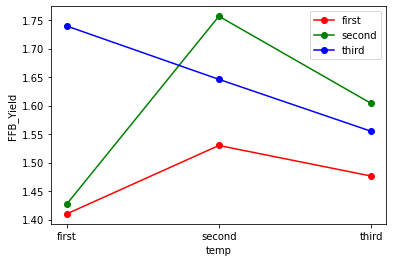

In [35]:
means = np.zeros((3,3))
for i,osadky in enumerate(['first','second','third']):
    for j,temp in enumerate(['first','second','third']):
    
        means[i,j] = data[(data['osadky']==osadky)&(data['temp']==temp) ]['FFB_Yield'].mean()
        print(osadky,temp,means[i,j])


colors = ['r','g','b']

for i,osadky in enumerate(['first','second','third']):

    plt.plot(means[i],color=colors[i],label=osadky,marker='o')

plt.xticks([0,1,2],['first','second','third'])
plt.xlabel('temp')
plt.ylabel('FFB_Yield')
plt.legend(loc=0)
plt.show()

In [30]:
aov_table = anova_lm(M, typ=2, robust = 'HC3')
print(aov_table)

                     sum_sq     df         F    PR(>F)
C(temp)            0.248470    2.0  1.805415  0.168807
C(osadky)          0.902048    2.0  6.554395  0.001983
C(temp):C(osadky)  0.503840    4.0  1.830481  0.127314
Residual           8.326311  121.0       NaN       NaN


H0: коэффициент незначим

Критерий: Pvalue (PR(>F)) маленький - H0 отвергаем

Для фактора temp H0 принимаем, для фактора osadky H0 отвергаем, для фактора temp:osadky H0 принимаем.

Вывод: несмотря на график, влияние взаимодействия средней температуры и фактора количества осадков отсутствует - рассматриваемые факторы влияют аддитивно; фактор влияния средней температуры незначим, а фактор влияния количество осадков значим.